## Test the TM pseudization routine and check the results against ld1.x (carbon, LDA).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# add pstudio to the search path
import sys
sys.path.append('..')

In [2]:
from pstudio import AE, set_output
from pstudio.TM import pseudize_TM
set_output(sys.stdout)

ae = AE('C', xcname='LDA', relativity='SR')
ae.run()


scalar relativistic atomic calculation for C (Carbon, Z=6)
configuration: 1s2 2s2 2p2, 6 electrons
exchange-correlation: lda_x+lda_c_pz
2001 radial gridpoints in [1e-05,100]

Converged in 63 iterations

Energy contributions:
------------------------------------------------------------------------
Kinetic:      +37.269733 Ha     +1014.161102 eV 
Ionic:        -87.619337 Ha     -2384.243613 eV 
Hartree:      +17.627276 Ha      +479.662609 eV 
XC:            -4.732032 Ha      -128.765157 eV 
------------------------------------------------------------------------
Total:        -37.454308 Ha     -1019.183627 eV 

state      eigenvalue      eigenvalue        rmax
------------------------------------------------------------------------
1s2         -9.961701 Ha  -271.071678 eV    0.175
2s2         -0.501784 Ha   -13.654238 eV    1.218
2p2         -0.199279 Ha    -5.422666 eV    1.189



In [3]:
# load LD1 results
ld1ae = np.loadtxt('LD1_C-LDA-TM/c.wfc')
ld1ps = np.loadtxt('LD1_C-LDA-TM/cps.wfc')

Pseudizing n=2, l=0
TM pseudization: l=0 rc=1.5382
AE norm within rc       : +0.542046
0-th AE derivative at rc: +0.762039
1-th AE derivative at rc: -0.286792
2-th AE derivative at rc: -0.507802
3-th AE derivative at rc: +1.868540
4-th AE derivative at rc: -4.053803
TM coefficients: [-0.27190093548911703, 0.14979603434042824, -0.004487770380826834, -0.2915994736094055, 0.1840238959958208, -0.046018698815102996, 0.004261789670242021]
norm error     : -5.551115123125783e-16
V"(0) condition: -1.5414752807529908e-14



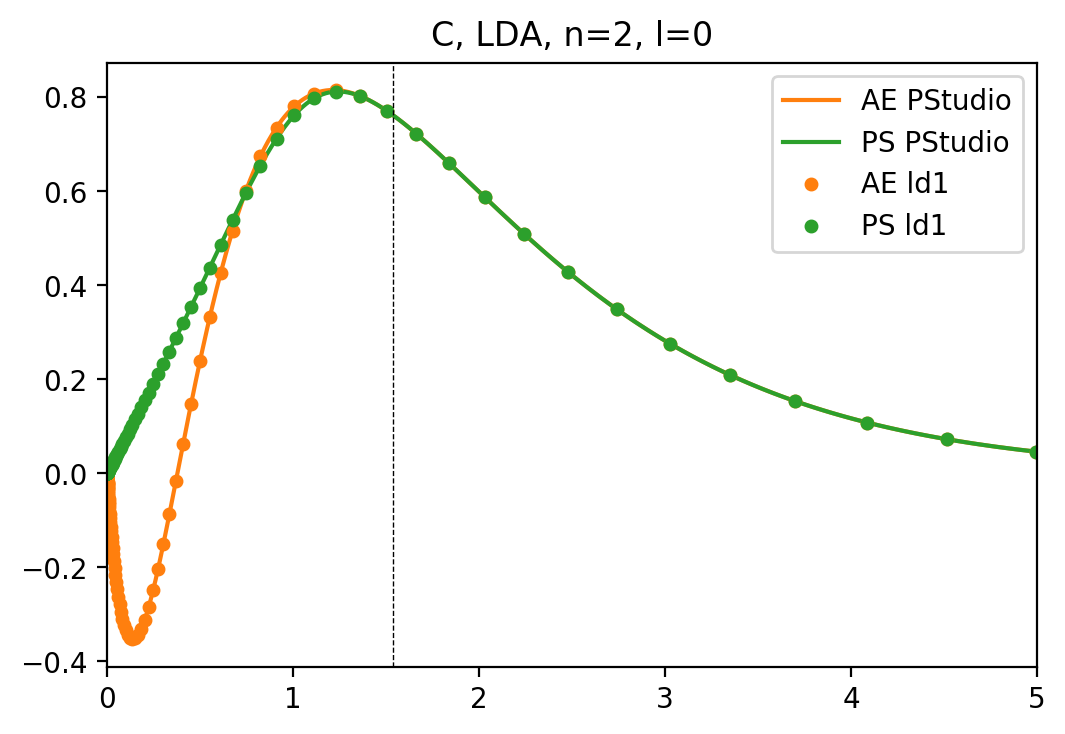


Pseudizing n=2, l=1
TM pseudization: l=1 rc=1.5382
AE norm within rc       : +0.475565
0-th AE derivative at rc: +0.675043
1-th AE derivative at rc: -0.161338
2-th AE derivative at rc: -0.287611
3-th AE derivative at rc: +0.812706
4-th AE derivative at rc: -1.558179
TM coefficients: [0.8500214007230048, -1.2840888004643276, -0.23555486392541872, 0.5467218238165642, -0.27670830682089087, 0.06261801767769086, -0.005473123713807588]
norm error     : -2.0483614804334138e-14
V"(0) condition: -1.509903313490213e-14



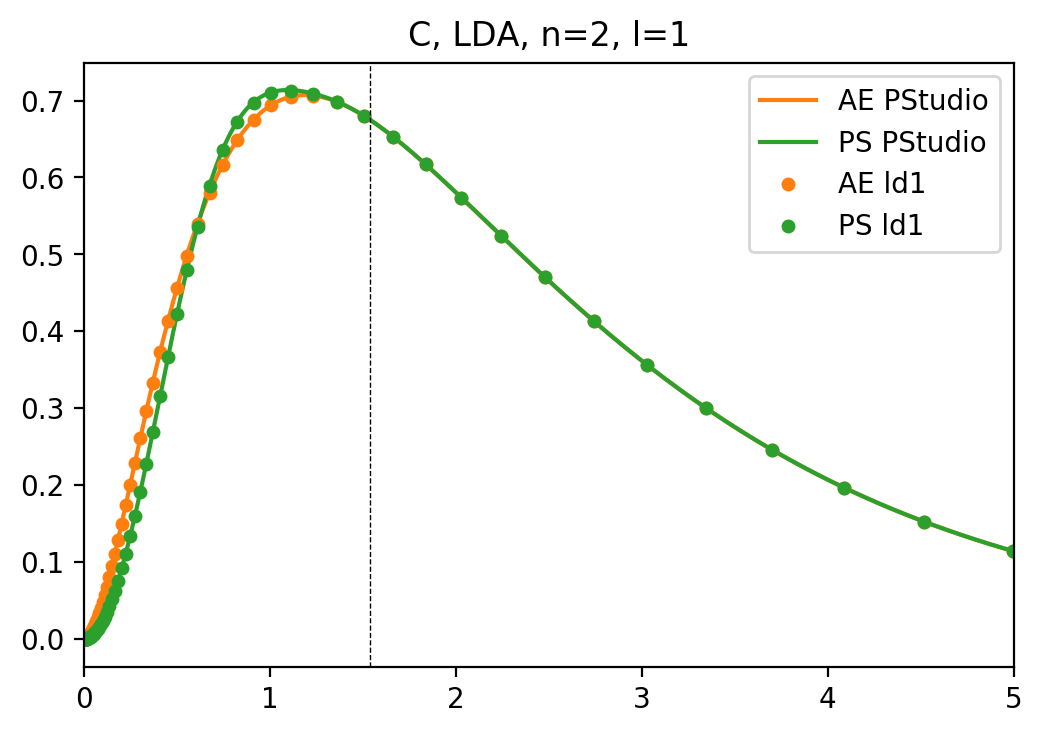

In [4]:
# loop over the valence orbitals
r = ae.rgd.r
ps = []
for orb in ae.orbitals[1:]:
    n = orb.n
    l = orb.l
    aeorb = orb.ur
    rc = 1.54
    print('Pseudizing n={0}, l={1}'.format(n,l))
    psorb = pseudize_TM(aeorb, l, rc, ae.rgd, verbose=True)
    ps.append(psorb)
    print()

    plt.figure(figsize=(6,4), dpi=200)
    plt.plot(r, aeorb, color='C1', label='AE PStudio')
    plt.plot(r, psorb, color='C2', label='PS PStudio')
    if l == 0:
        plt.plot(ld1ae[::20,0], -ld1ae[::20,2], linestyle='none', marker='o', markersize=4, color='C1', label='AE ld1')
        plt.plot(ld1ps[::20,0], ld1ps[::20,1], linestyle='none', marker='o', markersize=4, color='C2', label='PS ld1')
    else:
        plt.plot(ld1ae[::20,0], ld1ae[::20,1], linestyle='none', marker='o', markersize=4, color='C1', label='AE ld1')
        plt.plot(ld1ps[::20,0], ld1ps[::20,2], linestyle='none', marker='o', markersize=4, color='C2', label='PS ld1')

    plt.axvline(rc, linestyle='dashed', color='black', linewidth=0.5)
    plt.xlim(0,5)
    plt.title('C, LDA, n={0}, l={1}'.format(n,l))
    plt.legend()
    plt.show()
    
    print()


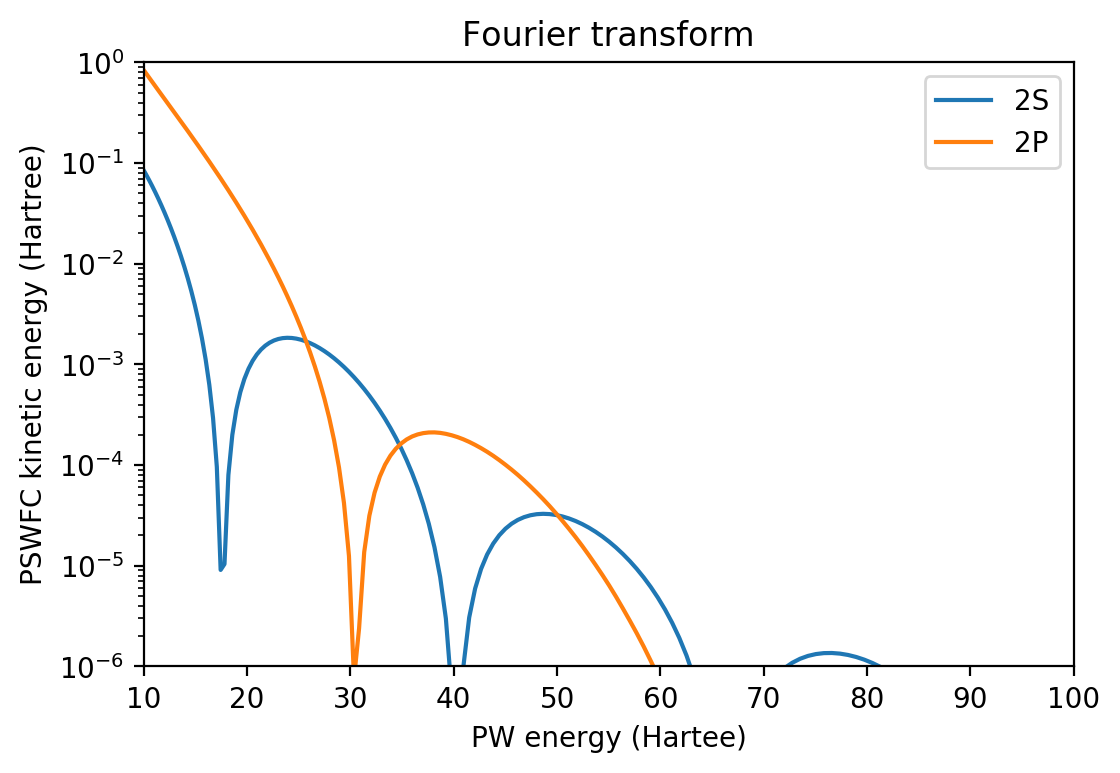

In [5]:
plt.figure(figsize=(6,4), dpi=200)

q, fq = ae.rgd.fft(ps[0], l=0)
plt.plot(0.5*q*q, 0.5*fq*fq*q*q, label='2S')
q, fq = ae.rgd.fft(ps[1], l=1)
plt.plot(0.5*q*q, 0.5*fq*fq*q*q, label='2P')

plt.xlim(10,100)
plt.xlabel('PW energy (Hartee)')

plt.ylim(1e-6, 1)
plt.yscale('log')
plt.ylabel('PSWFC kinetic energy (Hartree)')

plt.title('Fourier transform')
plt.legend()
plt.show()

Pseudizing n=2, l=0


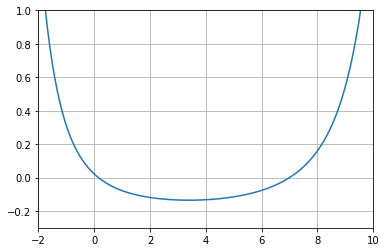


Pseudizing n=2, l=1


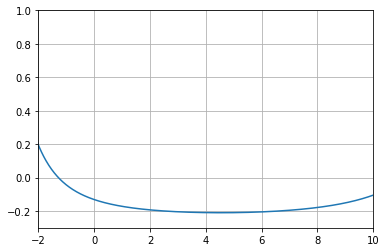

In [6]:
for orb in ae.orbitals[1:]:
    n = orb.n
    l = orb.l
    aeorb = orb.ur
    print('Pseudizing n={0}, l={1}'.format(n,l))
    psorb = pseudize_TM(aeorb, l, 1.54, ae.rgd, verbose=False, plot_c2=True)
    plt.xlim(-2,10)
    plt.ylim(-0.3,1)
    plt.show()
    print()
